# **<center><font style="color:rgb(100,109,254)">Digital Signal Processing Project: </font> </center>**
-  ### **<font style="color:rgb(134,19,348)">                             Group Members</font>** 

  -  Sharjeel Ahmed  (MSC-21S-009)
  -  Erum            (MSC-21S-001)
   

In [8]:
#!pip install matplotlib --user
#!pip install scipy --user

  Using cached matplotlib-3.5.1-cp38-cp38-win_amd64.whl (7.2 MB)


In [30]:
import scipy, matplotlib
# import matplotlib

### <font style="color:rgb(100,50,354)"> Fourier analysis is a field that studies how a mathematical function can be decomposed into a series of simpler trigonometric functions. The Fourier transform is a tool from this field for decomposing a function into its component frequencies.</font>
-  A `signal` is information that changes over time. For example, audio, video, and voltage traces are all examples of signals.
-  A `frequency` is the speed at which something repeats. For example, clocks tick at a frequency of one hertz (Hz), or one repetition per second.
-  `Power` in this case, just means the strength of each frequency.

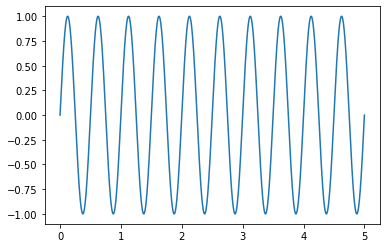

In [31]:
import numpy as np
from matplotlib import pyplot as plt

SAMPLE_RATE = 47100  # Hertz
DURATION = 5  # Seconds

def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    frequencies = x * freq
    # 2pi because np.sin takes radians
    y = np.sin((2 * np.pi) * frequencies)
    return x, y

# Generate a 2 hertz sine wave that lasts for 5 seconds
x, y = generate_sine_wave(2, SAMPLE_RATE, DURATION)
plt.plot(x, y)
plt.show()

In [32]:
_, nice_tone = generate_sine_wave(400, SAMPLE_RATE, DURATION)
_, noise_tone = generate_sine_wave(4000, SAMPLE_RATE, DURATION)
noise_tone = noise_tone * 0.9

mixed_tone = nice_tone + noise_tone


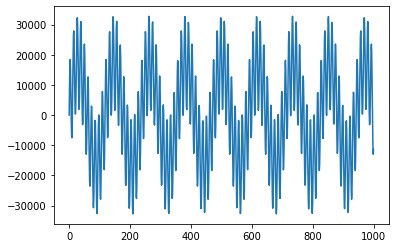

In [33]:
normalized_tone = np.int16((mixed_tone / mixed_tone.max()) * 32767)

plt.plot(normalized_tone[:1000])
plt.show()

In [34]:
from scipy.io.wavfile import write

# Remember SAMPLE_RATE = 44100 Hz is our playback rate
write("mysinewave2.wav", SAMPLE_RATE, normalized_tone)

In [36]:
#!pip install playsound
from playsound import playsound
playsound("mysinewave2.wav")

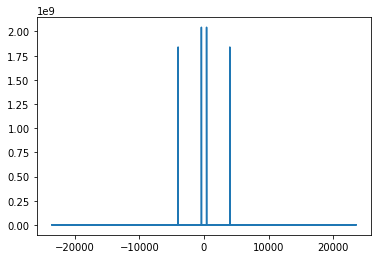

In [20]:
from scipy.fft import fft, fftfreq

# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

yf = fft(normalized_tone)
xf = fftfreq(N, 1 / SAMPLE_RATE)

plt.plot(xf, np.abs(yf))
plt.show()

In [21]:
yf = fft(normalized_tone)
xf = fftfreq(N, 1 / SAMPLE_RATE)

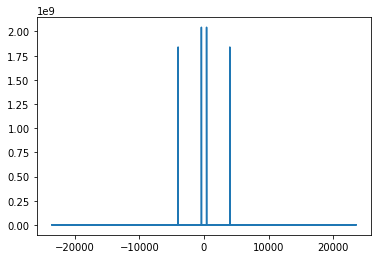

In [22]:
plt.plot(xf, np.abs(yf))
plt.show()

In [10]:
yf = fft(normalized_tone)
xf = fftfreq(N, 1 / SAMPLE_RATE)

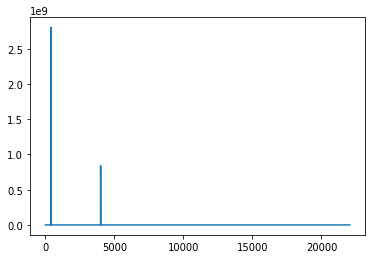

In [11]:
from scipy.fft import rfft, rfftfreq

# Note the extra 'r' at the front
yf = rfft(normalized_tone)
xf = rfftfreq(N, 1 / SAMPLE_RATE)

plt.plot(xf, np.abs(yf))
plt.show()

In [23]:
# The maximum frequency is half the sample rate
points_per_freq = len(xf) / (SAMPLE_RATE / 2)

# Our target frequency is 4000 Hz
target_idx = int(points_per_freq * 4000)

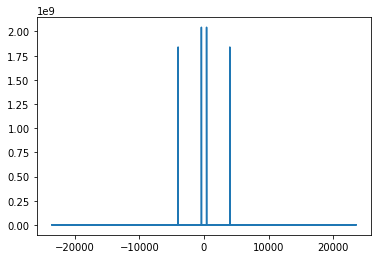

In [24]:
yf[target_idx - 1 : target_idx + 2] = 0

plt.plot(xf, np.abs(yf))
plt.show()

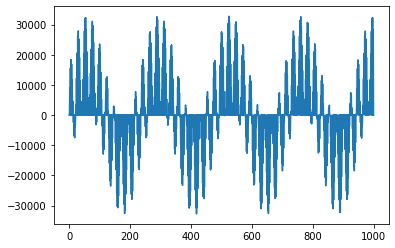

In [25]:
from scipy.fft import irfft

new_sig = irfft(yf)

plt.plot(new_sig[:1000])
plt.show()

In [26]:
norm_new_sig = np.int16(new_sig * (32767 / new_sig.max()))

write("clean2.wav", SAMPLE_RATE, norm_new_sig)